In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 25
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 5
plt.rcParams['ytick.major.width'] = 5
plt.rcParams['xtick.major.size']  = 16 #12
plt.rcParams['ytick.major.size']  = 16#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25

plt.rcParams['axes.linewidth'] = 5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'

In [8]:
datfile=pd.read_csv('..//Simulations//oumuamua_traj.csv')
times=datfile['Time'].to_numpy()
tdist=datfile['Distance'].to_numpy()

peri=2458006
times=times-peri

In [9]:
cutoff=4.7e13
dist=np.unique(tdist[np.where(times>0)])
dist=dist[np.where(dist<=cutoff)]

In [10]:
ntheta=500
nr=500

theta=np.linspace(0,np.pi,ntheta)
r=dist[np.round(np.linspace(0, len(dist) - 1, nr)).astype(int)]
THETA,R=np.meshgrid(theta,r,indexing='ij')

In [11]:
def tauratio(a,c,r,theta):
    alpha=5*1.101e23/(4*6.67e-8*2e33)
    
    term1=(r**2-(a**2-c**2)*np.cos(theta)**2)**2
    term2=r**3*np.sqrt((a*np.cos(theta))**2+(c*np.sin(theta))**2)
    
    return(alpha*term1/term2)

In [12]:
def tides(a,c,r,theta):
    G=6.67e-8
    M=2e33
    alpha=8*np.pi/15*G*M
    
    term1=a**2*c*r*(a**2-c**2)*np.sin(2*theta)
    term2=(r**2-(a**2-c**2)*np.cos(theta)**2)**2
    
    return(alpha*term1/term2)

def jet(a,c,r,theta):
    beta=2.306e23
    
    term1=a**2*c*(a**2-c**2)*np.sin(2*theta)
    term2=r**2*np.sqrt((a*np.cos(theta))**2+(c*np.sin(theta))**2)
    
    return(beta*term1/term2)

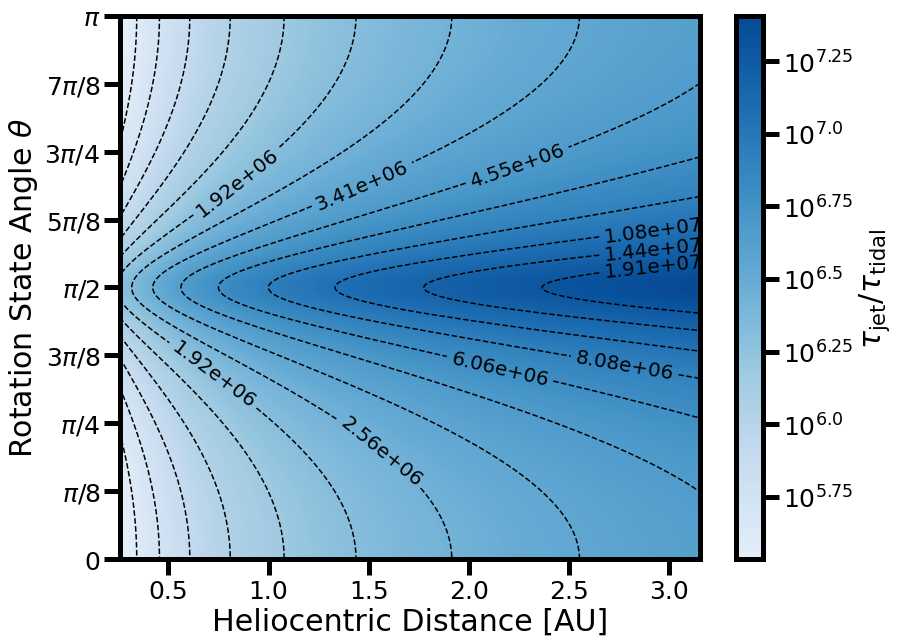

In [14]:
import matplotlib.ticker as ticker
import matplotlib.colors as colors

ratio=tauratio(11500,1900,R,THETA)

new_cmap = colors.LinearSegmentedColormap.from_list("test",plt.get_cmap('Blues')(np.linspace(0.1,0.9,100)))
new_cmap.set_bad('magenta')

fig, ax = plt.subplots(figsize=(13,10))
plt.imshow(np.log10(ratio),aspect='auto',extent=[np.min(r)/1.49e13,np.max(r)/1.49e13,0,np.pi],cmap=new_cmap,
          origin='lower')
plt.xlabel("Heliocentric Distance [AU]",fontsize=30)
plt.ylabel("Rotation State Angle $\\theta$",fontsize=30)
ax.set_yticks(np.pi*np.linspace(0,1,9))

ax.set_yticklabels([0,r"$\pi/8$",r"$\pi/4$",r"$3\pi/8$",r"$\pi/2$",
                   r"$5\pi/8$",r"$3\pi/4$",r"$7\pi/8$",r"$\pi$"])

def fmtbar(x,pos):
    return(r'$10^{{{}}}$'.format(x))

cb=plt.colorbar(ax=ax,format=ticker.FuncFormatter(fmtbar))
cb.set_label(r"$\tau_{\mathrm{jet}}/\tau_{\mathrm{tidal}}$",fontsize=30)

def fmtcont(x):
    return(r'{:.2e}'.format(x))

levels=np.logspace(np.min(np.log10(ratio)),np.max(np.log10(ratio)),16)

CS=ax.contour(R/1.49e13,THETA,ratio,origin='lower',colors='k',linestyles='dashed',levels=levels)
ax.clabel(CS, CS.levels[6:], inline=True, fmt=fmtcont, fontsize=20,rightside_up=True)
#plt.title("Outgassing to Tidal Torques Ratio")
#plt.grid()
plt.savefig('torque_ratio.pdf',
           bbox_inches='tight',dpi=300)
plt.show()